In [113]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import json

In [109]:
flex_dir = "flexible_commitment/"
minimal_dir = "minimal_commitment/"
maximal_dir = "maximal_commitment/"

In [142]:
def string_to_list(string):
    string = string[1:-1]
    string = string.replace(" ", "")
    res = string.split(",")
    return [float(x) for x in res]    

def combine_lists(attribute_list, folder_name):
    res = []
    for file in attribute_list:
        with open(folder_name+file, "r") as infile:
            data = infile.read()
            res.append(string_to_list(data))
    return res

def mean_min_max(list_of_lists):
    _mean = []
    _min = []
    _max = []
    for elements in zip(*list_of_lists):
        _min.append(min(elements))
        _max.append(max(elements))
        _mean.append(sum(elements)/len(elements))
    return _mean, _min, _max  

In [209]:
def plot_in_between(mean_min_max_list):
    _x = list(range(len(mean_min_max_list[0])))
    _y_mean = mean_min_max_list[0]
    _y_min = mean_min_max_list[1]
    _y_max = mean_min_max_list[2]
    plt.plot(_x, _y_mean)
    plt.fill_between(_x, _y_min, _y_max, alpha=0.3)
    plt.show()

def plot_by_metric(metric):
    metric_list_flex = [path for path in os.listdir(flex_dir) if metric in path]
    metric_list_min = [path for path in os.listdir(minimal_dir) if metric in path]
    metric_list_max = [path for path in os.listdir(maximal_dir) if metric in path]
    
    _y_flex_mean, _y_flex_min, _y_flex_max = mean_min_max(combine_lists(metric_list_flex, flex_dir))
    _y_min_mean, _y_min_min, _y_min_max = mean_min_max(combine_lists(metric_list_min, minimal_dir))
    _y_max_mean, _y_max_min, _y_max_max = mean_min_max(combine_lists(metric_list_max, maximal_dir))
    _x = list(range(len(_y_flex_mean)))
    
    plt.plot(_x, _y_flex_mean, color="blue")
    plt.plot(_x, _y_min_mean, color="green")
    plt.plot(_x, _y_max_mean, color="red")
    
    plt.fill_between(_x, _y_flex_min, _y_flex_max, alpha=0.3, color="blue", label="dynamic")
    plt.fill_between(_x, _y_min_min, _y_min_max, alpha=0.3, color="green", label="min")
    plt.fill_between(_x, _y_max_min, _y_max_max, alpha=0.3, color="red", label="max")
    plt.legend(loc="best")
    plt.title(metric)
    
    
    plt.show()
    
    
def plot_trajectory(last_ten_trajectories):
    for run in last_ten_trajectories:
        _xs = []
        _ys = []
        for coordinate in run[:-1]:
            _xs.append(coordinate[0])
            _ys.append(coordinate[1])
        plt.plot(_xs, _ys)
    plt.show()
            
            
    

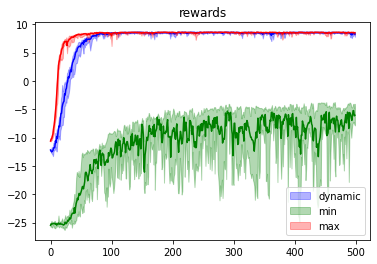

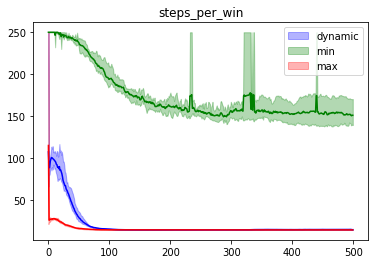

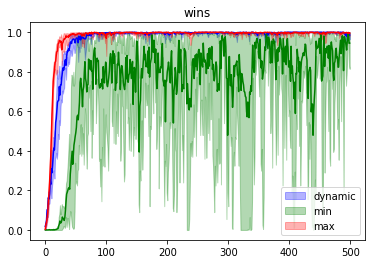

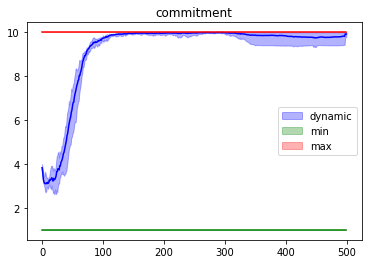

In [210]:
plot_by_metric("rewards")
plot_by_metric("steps_per_win")
plot_by_metric("wins")
plot_by_metric("commitment")

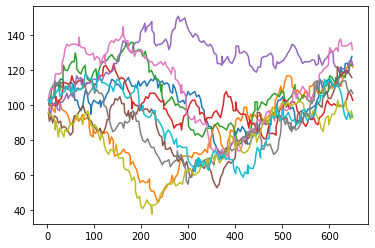

In [211]:
test_str="[[[4, 101], [7, 105], [12, 104], [17, 105], [17, 110], [21, 113], [26, 111], [28, 115], [33, 115], [36, 110], [41, 110], [46, 111], [51, 113], [56, 112], [58, 108], [59, 103], [64, 103], [68, 99], [72, 97], [76, 100], [79, 105], [82, 109], [86, 106], [88, 102], [93, 100], [93, 95], [95, 100], [99, 103], [104, 102], [109, 101], [113, 103], [114, 99], [117, 102], [122, 103], [126, 106], [131, 108], [134, 112], [138, 115], [143, 114], [147, 112], [152, 112], [157, 110], [162, 109], [163, 113], [168, 114], [173, 116], [177, 113], [181, 111], [186, 111], [191, 110], [194, 114], [198, 111], [203, 113], [208, 114], [212, 111], [216, 113], [221, 115], [226, 114], [230, 117], [234, 114], [236, 110], [240, 113], [245, 114], [249, 112], [254, 113], [259, 112], [262, 108], [267, 107], [268, 112], [272, 110], [276, 106], [279, 102], [284, 102], [289, 103], [293, 101], [296, 105], [300, 108], [304, 106], [309, 107], [314, 108], [318, 105], [323, 106], [327, 103], [329, 99], [334, 97], [335, 92], [340, 91], [344, 88], [349, 88], [352, 84], [355, 79], [359, 77], [363, 74], [368, 72], [371, 69], [375, 72], [378, 75], [383, 76], [388, 76], [393, 78], [398, 80], [398, 85], [403, 84], [406, 87], [411, 85], [415, 88], [420, 86], [424, 83], [426, 78], [431, 78], [435, 81], [439, 83], [444, 83], [449, 85], [452, 89], [456, 92], [461, 92], [466, 91], [471, 90], [476, 89], [476, 94], [481, 96], [485, 95], [488, 99], [491, 103], [496, 103], [501, 105], [505, 102], [509, 99], [514, 101], [518, 98], [523, 99], [526, 96], [528, 91], [533, 91], [538, 92], [543, 91], [546, 94], [551, 96], [555, 98], [560, 98], [565, 99], [570, 100], [574, 103], [578, 105], [578, 110], [580, 115], [584, 112], [587, 108], [589, 113], [594, 114], [599, 115], [604, 113], [608, 111], [613, 111], [614, 116], [619, 114], [622, 117], [625, 122], [628, 118], [632, 119], [634, 124], [639, 124], [642, 120], [644, 125], [648, 128], [0, 100]], [[4, 98], [8, 101], [12, 98], [17, 96], [18, 101], [23, 103], [28, 102], [31, 98], [36, 97], [41, 96], [45, 94], [49, 90], [54, 89], [57, 93], [62, 93], [67, 91], [71, 92], [76, 95], [79, 92], [84, 93], [89, 92], [90, 87], [93, 83], [98, 82], [98, 87], [102, 84], [107, 85], [112, 86], [117, 85], [122, 84], [127, 85], [131, 83], [133, 78], [137, 82], [141, 80], [141, 75], [144, 71], [149, 72], [154, 72], [158, 73], [163, 75], [167, 73], [172, 73], [177, 71], [177, 66], [182, 68], [187, 65], [191, 63], [194, 59], [198, 56], [203, 57], [208, 56], [213, 56], [218, 58], [218, 53], [222, 51], [227, 51], [231, 48], [235, 45], [240, 47], [245, 48], [248, 51], [253, 53], [258, 55], [263, 56], [266, 60], [269, 56], [273, 59], [278, 61], [281, 65], [283, 69], [288, 71], [293, 71], [298, 71], [303, 71], [308, 70], [312, 73], [317, 73], [322, 72], [327, 72], [331, 73], [336, 75], [341, 73], [343, 78], [348, 76], [348, 81], [352, 85], [355, 89], [360, 88], [364, 86], [368, 83], [370, 78], [374, 76], [379, 74], [384, 74], [384, 79], [388, 82], [390, 86], [395, 85], [400, 88], [402, 92], [407, 93], [412, 91], [416, 94], [419, 99], [424, 99], [426, 95], [430, 92], [433, 95], [437, 93], [441, 95], [446, 93], [450, 94], [455, 95], [458, 91], [463, 90], [467, 93], [472, 94], [476, 97], [481, 99], [485, 98], [485, 103], [490, 105], [494, 108], [497, 111], [499, 107], [503, 110], [506, 114], [510, 117], [515, 117], [520, 116], [521, 111], [526, 109], [529, 105], [531, 109], [536, 108], [541, 106], [545, 104], [548, 108], [553, 107], [558, 106], [558, 111], [563, 111], [568, 113], [571, 110], [576, 107], [581, 107], [585, 109], [590, 111], [592, 107], [597, 108], [602, 110], [607, 110], [611, 113], [615, 111], [620, 111], [625, 111], [628, 115], [633, 117], [636, 121], [641, 123], [646, 124], [650, 122], [0, 100]], [[3, 103], [8, 105], [10, 110], [14, 112], [19, 112], [24, 112], [27, 108], [29, 113], [34, 113], [34, 118], [35, 123], [39, 120], [44, 120], [48, 123], [53, 125], [58, 125], [60, 130], [63, 126], [63, 121], [68, 119], [72, 118], [76, 121], [81, 123], [82, 119], [86, 115], [91, 114], [95, 116], [99, 119], [104, 121], [106, 116], [110, 120], [114, 123], [118, 125], [123, 125], [128, 126], [133, 128], [138, 129], [142, 127], [147, 126], [152, 125], [155, 129], [160, 131], [165, 133], [169, 136], [173, 134], [178, 136], [183, 136], [185, 131], [190, 131], [195, 132], [200, 131], [204, 128], [209, 131], [212, 127], [216, 124], [217, 119], [222, 120], [227, 117], [231, 115], [236, 115], [240, 113], [242, 108], [244, 112], [244, 107], [246, 103], [250, 100], [255, 102], [260, 103], [265, 105], [269, 103], [273, 100], [278, 101], [283, 99], [288, 99], [293, 98], [298, 97], [300, 93], [301, 88], [306, 86], [311, 86], [315, 83], [320, 84], [325, 83], [330, 82], [334, 84], [338, 87], [343, 87], [348, 87], [353, 87], [358, 89], [363, 90], [367, 88], [372, 88], [377, 87], [382, 86], [386, 89], [391, 90], [396, 88], [400, 85], [403, 81], [407, 79], [412, 78], [416, 81], [421, 82], [425, 85], [429, 83], [433, 85], [435, 90], [437, 95], [442, 97], [442, 102], [447, 102], [447, 97], [452, 99], [456, 102], [461, 101], [466, 100], [469, 103], [474, 104], [479, 106], [484, 107], [489, 106], [494, 105], [498, 108], [503, 108], [505, 103], [510, 102], [515, 104], [519, 105], [524, 108], [527, 112], [528, 107], [533, 105], [536, 102], [540, 104], [545, 106], [550, 105], [555, 103], [560, 102], [564, 105], [569, 105], [569, 110], [574, 111], [578, 108], [583, 107], [588, 107], [593, 107], [598, 108], [599, 113], [601, 117], [606, 116], [610, 114], [615, 113], [620, 116], [624, 118], [629, 117], [634, 116], [636, 120], [640, 119], [644, 123], [649, 123], [0, 100]], [[4, 101], [9, 102], [14, 100], [19, 100], [19, 105], [22, 100], [26, 103], [31, 104], [33, 109], [35, 113], [40, 113], [45, 112], [50, 113], [53, 117], [56, 114], [61, 112], [66, 114], [71, 114], [76, 115], [76, 110], [80, 111], [85, 113], [90, 113], [95, 114], [99, 112], [104, 112], [108, 116], [113, 117], [118, 117], [120, 122], [125, 123], [129, 121], [134, 119], [138, 120], [142, 124], [145, 120], [150, 117], [154, 115], [159, 116], [164, 115], [168, 112], [172, 109], [176, 107], [180, 103], [180, 98], [183, 102], [188, 100], [193, 100], [197, 97], [201, 101], [206, 102], [210, 105], [215, 104], [219, 107], [224, 107], [229, 107], [234, 105], [239, 103], [243, 102], [248, 103], [248, 98], [253, 98], [257, 95], [262, 93], [266, 91], [270, 87], [275, 89], [280, 89], [284, 90], [286, 86], [288, 90], [291, 94], [296, 95], [300, 98], [304, 101], [309, 103], [314, 103], [318, 100], [323, 99], [325, 95], [329, 96], [334, 95], [337, 90], [340, 93], [345, 93], [350, 93], [355, 96], [360, 97], [364, 95], [369, 93], [372, 97], [375, 101], [377, 106], [381, 108], [385, 105], [390, 105], [394, 101], [396, 97], [401, 97], [401, 102], [403, 98], [408, 96], [412, 95], [417, 95], [422, 95], [426, 91], [429, 87], [431, 92], [435, 89], [440, 90], [444, 87], [449, 85], [453, 87], [456, 83], [461, 81], [466, 81], [469, 85], [472, 89], [472, 84], [477, 84], [482, 84], [487, 83], [487, 88], [490, 91], [493, 96], [497, 99], [502, 98], [502, 103], [507, 103], [511, 102], [515, 98], [519, 102], [524, 102], [529, 101], [532, 97], [537, 95], [541, 93], [545, 90], [550, 88], [554, 90], [558, 94], [562, 92], [567, 93], [571, 90], [576, 89], [579, 93], [584, 94], [589, 96], [592, 100], [596, 103], [600, 101], [605, 100], [610, 101], [615, 100], [620, 100], [625, 100], [630, 99], [634, 102], [638, 104], [641, 108], [646, 106], [650, 103], [0, 100]], [[4, 98], [8, 94], [9, 99], [14, 101], [19, 102], [22, 98], [27, 97], [28, 102], [33, 102], [38, 104], [42, 107], [45, 104], [49, 106], [54, 107], [58, 104], [58, 109], [61, 113], [63, 117], [67, 115], [72, 116], [73, 112], [78, 111], [83, 112], [88, 113], [93, 113], [98, 115], [103, 115], [108, 114], [112, 116], [117, 114], [121, 117], [126, 119], [131, 118], [136, 119], [140, 120], [143, 124], [148, 124], [151, 128], [156, 130], [159, 134], [162, 137], [167, 136], [171, 133], [176, 131], [181, 130], [183, 134], [188, 136], [193, 136], [197, 137], [199, 142], [204, 144], [208, 147], [209, 142], [213, 145], [218, 146], [223, 148], [223, 143], [228, 141], [228, 136], [232, 134], [237, 135], [242, 135], [247, 136], [252, 138], [256, 136], [259, 132], [263, 135], [264, 140], [267, 143], [272, 144], [275, 149], [279, 151], [283, 148], [288, 149], [293, 150], [297, 146], [301, 143], [306, 141], [310, 139], [315, 141], [320, 140], [324, 137], [329, 136], [333, 137], [338, 135], [343, 134], [347, 135], [352, 133], [355, 130], [360, 129], [362, 124], [367, 124], [372, 123], [372, 128], [374, 124], [379, 126], [384, 128], [388, 125], [393, 124], [397, 126], [401, 129], [402, 134], [407, 134], [409, 130], [414, 130], [419, 131], [424, 130], [428, 128], [431, 123], [436, 122], [440, 120], [445, 119], [449, 122], [454, 122], [456, 127], [461, 128], [466, 128], [471, 129], [476, 130], [480, 128], [481, 123], [486, 121], [489, 125], [493, 124], [498, 125], [503, 126], [508, 128], [512, 130], [517, 132], [521, 135], [526, 134], [530, 132], [534, 129], [539, 127], [543, 124], [548, 125], [553, 125], [558, 125], [563, 126], [568, 126], [572, 123], [577, 124], [577, 129], [581, 126], [585, 123], [590, 126], [594, 127], [599, 129], [604, 131], [608, 130], [609, 125], [613, 122], [618, 122], [623, 121], [628, 121], [633, 121], [637, 118], [642, 120], [642, 125], [647, 126], [650, 123], [0, 100]], [[3, 96], [5, 91], [9, 94], [12, 90], [16, 94], [21, 93], [24, 90], [29, 91], [31, 87], [36, 88], [41, 87], [45, 85], [50, 83], [55, 85], [55, 90], [58, 94], [63, 94], [67, 96], [72, 98], [77, 100], [81, 96], [85, 95], [89, 92], [94, 91], [99, 88], [103, 87], [108, 85], [113, 87], [116, 83], [121, 85], [125, 88], [128, 92], [133, 92], [133, 97], [137, 100], [142, 101], [145, 104], [150, 103], [155, 105], [159, 101], [164, 101], [165, 96], [170, 94], [173, 97], [175, 93], [178, 96], [182, 92], [185, 96], [190, 95], [194, 98], [199, 100], [203, 97], [208, 98], [213, 98], [218, 96], [222, 98], [226, 96], [231, 94], [232, 89], [235, 86], [239, 83], [244, 82], [246, 77], [250, 80], [252, 75], [257, 75], [262, 76], [266, 73], [270, 71], [275, 71], [279, 68], [284, 70], [288, 68], [292, 65], [297, 68], [300, 64], [303, 60], [307, 59], [311, 63], [315, 65], [320, 66], [325, 66], [330, 65], [335, 64], [338, 68], [343, 69], [345, 64], [349, 62], [352, 58], [357, 55], [361, 53], [366, 55], [369, 59], [373, 61], [376, 64], [381, 66], [386, 68], [391, 67], [395, 68], [400, 70], [401, 74], [401, 79], [406, 77], [409, 80], [414, 81], [419, 80], [423, 78], [423, 83], [428, 81], [433, 84], [437, 85], [442, 84], [447, 86], [447, 91], [447, 96], [452, 96], [455, 92], [460, 91], [465, 89], [470, 90], [474, 93], [479, 95], [484, 95], [488, 93], [493, 95], [498, 93], [503, 92], [508, 93], [512, 90], [517, 90], [521, 87], [526, 87], [531, 90], [533, 95], [537, 96], [542, 97], [546, 95], [551, 96], [555, 94], [560, 92], [565, 92], [568, 96], [571, 99], [575, 102], [580, 100], [585, 99], [586, 104], [591, 106], [595, 108], [598, 104], [603, 104], [608, 107], [612, 110], [616, 112], [617, 117], [617, 122], [622, 119], [625, 116], [629, 119], [634, 119], [639, 120], [643, 118], [648, 116], [0, 100]], [[3, 103], [5, 107], [9, 110], [13, 109], [16, 114], [18, 118], [22, 118], [27, 118], [32, 119], [32, 124], [36, 128], [38, 132], [42, 135], [47, 134], [52, 135], [57, 135], [62, 135], [67, 134], [68, 139], [70, 134], [75, 133], [80, 133], [83, 130], [88, 129], [93, 129], [98, 130], [101, 126], [106, 128], [111, 127], [114, 123], [118, 127], [122, 129], [124, 124], [124, 129], [129, 131], [132, 135], [137, 137], [142, 136], [146, 138], [151, 137], [155, 138], [160, 140], [162, 145], [163, 140], [167, 137], [172, 137], [173, 133], [178, 130], [183, 132], [186, 128], [190, 131], [195, 131], [200, 132], [204, 130], [208, 127], [213, 127], [218, 125], [223, 125], [227, 123], [232, 123], [237, 124], [242, 125], [247, 123], [251, 125], [255, 122], [259, 121], [264, 118], [267, 122], [272, 120], [273, 115], [278, 114], [283, 111], [285, 107], [286, 112], [287, 107], [291, 108], [295, 105], [296, 100], [296, 95], [301, 94], [305, 92], [310, 92], [314, 94], [315, 90], [320, 91], [325, 92], [329, 90], [334, 89], [339, 90], [341, 85], [344, 81], [346, 76], [351, 75], [355, 73], [359, 76], [364, 75], [364, 70], [368, 72], [372, 75], [376, 71], [380, 70], [384, 73], [387, 69], [387, 74], [390, 78], [395, 79], [399, 82], [403, 78], [406, 74], [411, 74], [415, 77], [417, 82], [422, 81], [427, 84], [431, 86], [435, 83], [438, 87], [443, 86], [445, 90], [450, 92], [455, 90], [460, 89], [463, 93], [467, 96], [472, 97], [475, 93], [480, 95], [484, 91], [485, 96], [490, 96], [494, 99], [498, 100], [500, 95], [504, 98], [509, 97], [514, 98], [518, 100], [522, 103], [523, 108], [528, 109], [530, 104], [534, 107], [539, 108], [543, 111], [548, 109], [553, 108], [553, 103], [556, 107], [560, 104], [564, 101], [565, 106], [570, 108], [573, 112], [578, 113], [579, 118], [584, 119], [589, 121], [594, 122], [598, 123], [599, 128], [601, 133], [605, 131], [610, 131], [615, 133], [619, 131], [620, 136], [624, 138], [627, 134], [632, 134], [637, 134], [642, 135], [647, 136], [649, 132], [0, 100]], [[4, 100], [9, 102], [13, 105], [16, 109], [17, 114], [21, 111], [26, 114], [30, 111], [35, 109], [40, 111], [44, 109], [48, 113], [50, 108], [54, 105], [57, 109], [62, 108], [66, 110], [71, 109], [76, 110], [80, 113], [83, 109], [87, 106], [92, 108], [97, 110], [101, 112], [101, 107], [106, 109], [111, 107], [116, 107], [120, 105], [121, 100], [126, 99], [129, 95], [132, 92], [136, 88], [140, 85], [145, 86], [149, 88], [154, 90], [159, 90], [163, 87], [165, 91], [170, 90], [175, 91], [178, 95], [183, 97], [187, 95], [190, 91], [195, 91], [197, 87], [200, 83], [204, 80], [209, 79], [214, 81], [218, 78], [222, 76], [227, 76], [231, 73], [236, 71], [240, 69], [245, 66], [249, 68], [254, 68], [259, 69], [262, 65], [267, 67], [271, 68], [276, 69], [277, 74], [280, 70], [285, 72], [289, 69], [292, 66], [296, 62], [296, 57], [300, 55], [302, 59], [307, 59], [309, 63], [314, 66], [317, 69], [321, 66], [326, 67], [331, 68], [336, 69], [341, 69], [346, 70], [350, 68], [355, 66], [357, 71], [361, 73], [366, 74], [371, 73], [375, 70], [379, 73], [383, 75], [388, 76], [393, 74], [397, 75], [402, 75], [403, 80], [408, 79], [413, 81], [417, 82], [422, 82], [427, 83], [432, 85], [437, 85], [442, 86], [445, 90], [450, 88], [452, 83], [456, 80], [456, 75], [461, 75], [464, 79], [469, 77], [474, 78], [478, 75], [482, 72], [486, 73], [491, 75], [493, 80], [496, 83], [498, 88], [498, 93], [503, 92], [507, 89], [510, 93], [513, 89], [517, 86], [519, 90], [520, 85], [524, 88], [529, 86], [534, 87], [538, 89], [538, 94], [541, 90], [544, 93], [549, 95], [554, 95], [559, 95], [559, 100], [563, 102], [568, 103], [568, 108], [568, 113], [573, 114], [573, 109], [575, 114], [580, 113], [585, 114], [589, 112], [594, 111], [599, 114], [601, 110], [606, 112], [611, 112], [616, 112], [619, 115], [621, 111], [625, 113], [630, 114], [635, 114], [638, 110], [642, 107], [646, 109], [650, 107], [0, 100]], [[3, 96], [8, 94], [13, 94], [17, 91], [17, 86], [19, 91], [22, 87], [24, 82], [27, 87], [31, 85], [36, 82], [38, 86], [43, 85], [47, 88], [52, 90], [56, 89], [60, 92], [64, 95], [68, 92], [73, 93], [76, 89], [78, 94], [83, 95], [87, 97], [90, 93], [93, 89], [98, 87], [102, 89], [107, 87], [110, 83], [113, 80], [116, 84], [120, 81], [122, 77], [126, 74], [131, 72], [135, 75], [140, 74], [145, 74], [147, 78], [149, 74], [152, 70], [157, 70], [162, 70], [163, 65], [168, 63], [173, 63], [177, 61], [180, 57], [185, 59], [188, 56], [188, 51], [192, 47], [197, 48], [199, 43], [203, 41], [208, 43], [212, 46], [216, 44], [221, 43], [223, 38], [223, 43], [228, 43], [233, 44], [238, 45], [241, 49], [246, 51], [250, 53], [255, 55], [260, 55], [265, 55], [269, 57], [274, 54], [279, 55], [283, 56], [288, 55], [291, 59], [294, 63], [299, 62], [304, 64], [308, 62], [313, 60], [318, 61], [323, 62], [327, 65], [332, 66], [337, 66], [340, 70], [341, 65], [343, 69], [348, 69], [352, 71], [356, 68], [358, 72], [363, 70], [367, 67], [371, 69], [376, 70], [381, 72], [385, 74], [388, 78], [389, 83], [394, 82], [398, 79], [401, 75], [403, 79], [408, 79], [411, 75], [416, 73], [421, 73], [426, 74], [430, 76], [434, 79], [434, 84], [439, 82], [443, 84], [446, 79], [450, 82], [454, 85], [458, 89], [461, 92], [466, 93], [470, 90], [474, 94], [479, 94], [479, 99], [484, 98], [485, 93], [489, 96], [494, 98], [498, 101], [502, 102], [507, 99], [511, 102], [516, 100], [521, 100], [526, 101], [531, 101], [535, 103], [540, 102], [545, 101], [548, 96], [552, 94], [557, 93], [562, 94], [566, 97], [571, 96], [575, 93], [579, 91], [583, 87], [587, 85], [589, 89], [593, 93], [598, 94], [599, 89], [602, 92], [606, 95], [611, 95], [615, 98], [618, 103], [621, 99], [626, 100], [631, 99], [635, 103], [637, 98], [642, 96], [645, 92], [647, 97], [650, 93], [0, 100]], [[3, 103], [7, 101], [11, 104], [16, 106], [21, 108], [25, 110], [28, 105], [33, 107], [38, 108], [42, 111], [47, 109], [51, 108], [54, 112], [56, 107], [60, 110], [65, 109], [70, 109], [75, 110], [79, 114], [81, 118], [85, 117], [90, 115], [95, 115], [97, 111], [101, 108], [106, 111], [106, 116], [110, 119], [113, 115], [117, 113], [122, 113], [127, 112], [132, 111], [137, 111], [141, 108], [145, 112], [149, 115], [154, 114], [158, 111], [162, 108], [166, 105], [171, 104], [176, 105], [180, 107], [185, 108], [188, 112], [193, 110], [195, 105], [196, 100], [200, 97], [204, 100], [206, 95], [211, 94], [216, 93], [221, 94], [225, 97], [230, 97], [230, 92], [235, 92], [240, 90], [244, 88], [248, 85], [250, 80], [253, 84], [258, 86], [263, 84], [267, 81], [270, 78], [275, 81], [277, 76], [282, 77], [287, 76], [292, 76], [297, 76], [298, 72], [301, 68], [306, 66], [311, 65], [315, 62], [317, 66], [321, 70], [321, 65], [323, 70], [323, 65], [326, 69], [330, 65], [334, 68], [339, 66], [343, 63], [346, 66], [349, 70], [353, 73], [358, 74], [363, 72], [367, 69], [371, 71], [376, 72], [380, 69], [385, 70], [390, 69], [395, 69], [397, 64], [401, 61], [403, 65], [408, 64], [412, 61], [417, 59], [421, 62], [425, 61], [427, 66], [427, 61], [429, 65], [433, 64], [438, 64], [442, 67], [444, 72], [447, 76], [451, 74], [454, 70], [454, 75], [459, 77], [464, 77], [467, 81], [472, 81], [473, 86], [476, 90], [478, 94], [483, 93], [487, 94], [489, 99], [493, 95], [495, 91], [499, 94], [502, 98], [503, 93], [508, 94], [513, 96], [517, 93], [521, 91], [526, 92], [530, 89], [535, 90], [539, 93], [543, 97], [548, 98], [550, 93], [554, 91], [558, 93], [563, 94], [568, 94], [572, 98], [575, 102], [580, 102], [582, 106], [587, 105], [589, 110], [590, 115], [594, 112], [598, 114], [603, 115], [607, 112], [612, 110], [616, 112], [621, 110], [625, 107], [628, 103], [630, 98], [633, 94], [637, 92], [641, 96], [645, 93], [649, 94], [0, 100]]]"
plot_trajectory(json.loads(test_str))